# Assignment1 Part4

### Loading all required Library functions

In [1]:
# Import libraries
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Import each file
import checkFile
import accuracyCheck
import LossCheck
import Train
import Net

In [2]:
# Check for GPU/CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### Setting Parameters

In [3]:
# Parameters
batch_size = 100
valid_size = 1000
Epoch = 10

### Loading training, validation & test datasets

In [4]:
# Loading datasets & class labels
trainloader, validloader, testloader, classes = checkFile.initFiles(batch_size, valid_size)

TrainData Done
Size Train Data: 60000
TrainLoader Done
Size Train: 590
ValidLoader Done
Size Train: 10
TestSet Done
Size Train: 10000
TestLoader Done
Size Train: 100


### Defining the NN

In [5]:
net = Net.Net()
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### Initializing vectors to store Accuracy & Loss

In [6]:
# Initialize Accuracy List
trainAccuracy = np.zeros(1)
validAccuracy = np.zeros(1)

# Initialize Loss List
trainLoss = np.zeros(1)
validLoss = np.zeros(1)

### Training the NN

In [7]:
# Train your model
for epoch in range(Epoch):  # loop over the dataset multiple times

    trainLossTemp, net = Train.train(trainloader, net, 'Training', epoch)
    trainLoss = np.append(trainLoss, trainLossTemp)
    validLoss = np.append(validLoss, LossCheck.lossCheck(validloader, net, 'Validation', epoch))

    trainAccuracy = np.append(trainAccuracy, accuracyCheck.accuracyCheck(trainloader, net, 'Training'))
    validAccuracy = np.append(validAccuracy, accuracyCheck.accuracyCheck(validloader, net, 'Validation'))

print('Fin...')

<built-in method size of Tensor object at 0x11adcbee8>
<built-in method size of Tensor object at 0x11803d3a8>
<built-in method size of Tensor object at 0x11adcbee8>
<built-in method size of Tensor object at 0x11adcbf78>
<built-in method size of Tensor object at 0x11adcbee8>
<built-in method size of Tensor object at 0x11adcbf78>
<built-in method size of Tensor object at 0x11adcbee8>
<built-in method size of Tensor object at 0x11adcbf78>
<built-in method size of Tensor object at 0x11adcbee8>
<built-in method size of Tensor object at 0x11adcbf78>
<built-in method size of Tensor object at 0x11adcbee8>
<built-in method size of Tensor object at 0x11adcbf78>
<built-in method size of Tensor object at 0x11adcbee8>
<built-in method size of Tensor object at 0x11adcbf78>
<built-in method size of Tensor object at 0x11adcbee8>
<built-in method size of Tensor object at 0x11adcbf78>
<built-in method size of Tensor object at 0x11adcbee8>
<built-in method size of Tensor object at 0x11adcbf78>
<built-in 

### Deleting the 1st value of the accuracy & loss vectors
Since the vector is initialized using zeros & rest are appended, we need to delete the 1st rogue variable.

In [8]:
# Deleting 1st index value
trainLoss = np.delete(trainLoss,0)
validLoss = np.delete(validLoss,0)
trainAccuracy = np.delete(trainAccuracy,0)
validAccuracy = np.delete(validAccuracy,0)

### Plotting the Accuracy & Loss Vs Epoch

In [9]:
print("trainLoss is ", trainLoss)
print("validLoss is ", validLoss)
print("trainAccuracy is ", trainAccuracy)
print("validAccuracy is ", validAccuracy)

%matplotlib inline

trainLoss is  [ 0.41496381  0.41856912  0.3043167   0.34200141  0.29830274  0.33420989
  0.38114163  0.25197476  0.28756371  0.27280703]
validLoss is  [ 0.46701974  0.56859785  0.61069304  0.37358052  0.36430603  0.36744645
  0.35640743  0.20133972  0.28319234  0.3295761 ]
trainAccuracy is  [ 83.92711864  85.36101695  85.69322034  86.99830508  87.58305085
  87.57627119  88.05254237  88.99322034  89.29491525  89.73220339]
validAccuracy is  [ 82.7  84.2  84.2  85.8  85.2  85.9  87.2  87.3  87.3  87. ]


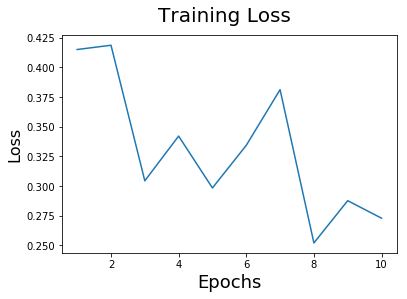

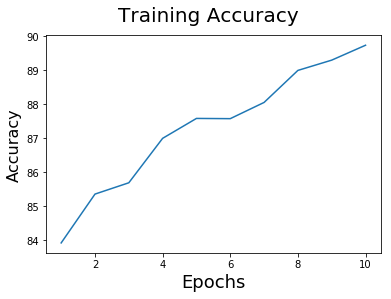

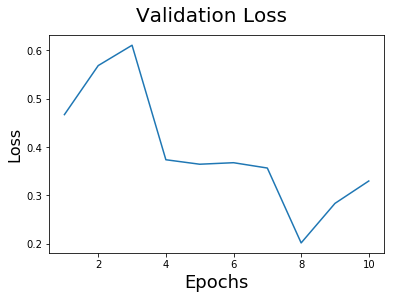

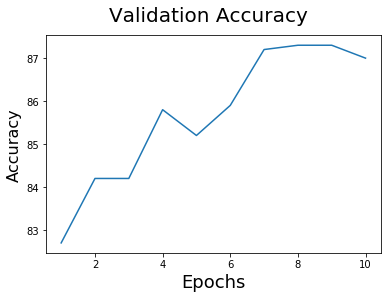

In [10]:
# Plots

# Making X axis
xAxis = np.arange(1, Epoch + 1 )


# Training loss vs. epochs
fig1 = plt.figure()
plt.plot(xAxis, trainLoss)
fig1.suptitle('Training Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=16)

# Training accuracy vs. epochs
fig2 = plt.figure()
plt.plot(xAxis, trainAccuracy)
fig2.suptitle('Training Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)

# Validation loss vs epochs
fig3 = plt.figure()
plt.plot(xAxis, validLoss)
fig3.suptitle('Validation Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=16)

# Validation accuracy vs. epochs
fig4 = plt.figure()
plt.plot(xAxis, validAccuracy)
fig4.suptitle('Validation Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)